In [ ]:
from speechsep.imports import *
from speechsep.data import *
from speechsep.core import *

In [ ]:
class SiameseAudio(Tuple):
    def show(self, ctx=None, **kwargs):
        self[0].show()
        self[0].listen()
        self[1].show()
        self[1].listen()

In [ ]:
class SiamesePiar(Transform):
    def __init__(self, items, labels):
        store_attr(self, 'items,labels')
        self.assoc = self
        sortlbl = sorted(enumerate(labels), key=itemgetter(1))
        self.clsmap = {k:L(v).itemgot(0) for k,v in itertools.groupby(sortlbl, key=itemgetter(1))}
        self.idxs = range_of(self.items)
        
    def encodes(self,i)->None:
        othercls=self.clsmap[self.labels[i]] if random.random()>0.5 else self.idxs
        otherit = random.choice(othercls)
        return SiameseAudio(self.items[i], self.items[otherit], self.labels[otherit]==self.labels[i])

In [ ]:
@patch_clsmthd
def temp_create(cls:AudioMono, fn:Path, sr=None):
    audio = cls(*load_audio(fn),fn)
    if sr: audio.sr = sr
    return audio

In [ ]:
items = get_audio_files("../data/SmallDataset/")

In [ ]:
#adjust_pipe = Pipeline((Resample(22048), Clip(4)), as_item=False)
sp = SiamesePiar(items, items.map(parent_label))
pipe = Pipeline([sp, AudioMono.create, Resample(22050), Clip(5)])

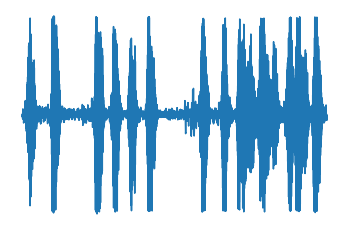

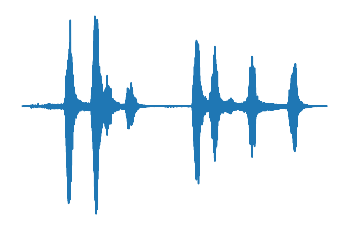

In [ ]:
pipe(0).show()